# EDA



- Noticed imbalanced data from EDA -- > consider metrics like precision, recall, F1-score, ROC-AUC, and precision-recall curves or oversampling



## Data Sources:

- Clear Lake (Facebook Images): https://www.facebook.com/ClearLakeWaterQuality/photos

- Cayuga Lake: http://www.communityscience.org/monitoring-partnerships/harmful-algal-bloom-monitoring/harmful-algal-bloom-datasets/

- Wyoming Lakes: https://wdeq.maps.arcgis.com/apps/Shortlist/index.html?appid=342d22d86d0048819b8dfa61dd3ff061

- Florida Lakes: https://floridadep.gov/AlgalBloom

In [ ]:
# For Data Processing
import numpy as np
import pandas as pd
import os
import random
from sklearn.utils import shuffle
from PIL import Image, ImageEnhance
import matplotlib.pyplot as plt
import seaborn as sns


# For ML Models
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras import models
from keras import layers
import sklearn.metrics as metrics
from tensorflow.keras import regularizers
from sklearn.metrics import recall_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import random

In [ ]:
!unzip /no_advisory.zip

Archive:  /no_advisory.zip
replace __MACOSX/._no_advisory? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
!unzip /caution.zip

Archive:  /caution.zip
   creating: caution/
  inflating: __MACOSX/._caution      
  inflating: caution/BloomImg1-20230718-091437(3).jpg  
  inflating: __MACOSX/caution/._BloomImg1-20230718-091437(3).jpg  
  inflating: caution/BloomImg1-20230206-153907.jpg  
  inflating: __MACOSX/caution/._BloomImg1-20230206-153907.jpg  
  inflating: caution/5AJ9UNGqolv0aNDzwe-snUXECRGrDCpohdwbBwuWK0SJfV_0M_VFYRHzT2T7TohfrImo2QnNuIGV7UGlbPjNMa2ZRU0_pJQE7dQ7g4E_329sUbFgPj82cVsKeuJBQrQGtneWRvVV0OKpJO3GsZb7ZSsvaLQEvKOgRYvfogLG_4H9BwlLTo7d-tFqshb48CwuCc6QmQWTd.png  
  inflating: __MACOSX/caution/._5AJ9UNGqolv0aNDzwe-snUXECRGrDCpohdwbBwuWK0SJfV_0M_VFYRHzT2T7TohfrImo2QnNuIGV7UGlbPjNMa2ZRU0_pJQE7dQ7g4E_329sUbFgPj82cVsKeuJBQrQGtneWRvVV0OKpJO3GsZb7ZSsvaLQEvKOgRYvfogLG_4H9BwlLTo7d-tFqshb48CwuCc6QmQWTd.png  
  inflating: caution/353_image3-20201201-srra-boatlaunch-water.JPG  
  inflating: __MACOSX/caution/._353_image3-20201201-srra-boatlaunch-water.JPG  
  inflating: caution/L4n.png         
  inflating: __MACOSX

In [ ]:
!unzip /danger.zip

Archive:  /danger.zip
   creating: danger/
  inflating: __MACOSX/._danger       
  inflating: danger/366061938_781634573757957_8303770379324560489_n.jpg  
  inflating: __MACOSX/danger/._366061938_781634573757957_8303770379324560489_n.jpg  
  inflating: danger/5AE15E~1.PNG     
  inflating: __MACOSX/danger/._5AE15E~1.PNG  
  inflating: danger/156_image1-20200729-173817.jpg  
  inflating: __MACOSX/danger/._156_image1-20200729-173817.jpg  
  inflating: danger/5AD757~1.PNG     
  inflating: __MACOSX/danger/._5AD757~1.PNG  
  inflating: danger/5A4309~1.PNG     
  inflating: __MACOSX/danger/._5A4309~1.PNG  
  inflating: danger/L4y.png          
  inflating: __MACOSX/danger/._L4y.png  
  inflating: danger/L48.png          
  inflating: __MACOSX/danger/._L48.png  
  inflating: danger/5A984C~1.PNG     
  inflating: __MACOSX/danger/._5A984C~1.PNG  
  inflating: danger/5A070D~1.PNG     
  inflating: __MACOSX/danger/._5A070D~1.PNG  
  inflating: danger/5AE81B~1.PNG     
  inflating: __MACOSX/dange

In [ ]:
#Paths to data directories
caution_dir = './caution'
danger_dir = './danger'
noadvis_dir = './no_advisory'

#Pull in training data
caution_data = []
caution_data_labels = []

danger_data = []
danger_lake_labels = []

no_advisory_data = []
no_advisory_lake_labels = []

#getting the paths and labels of our caution data
for image in os.listdir(caution_dir):
    caution_data.append(caution_dir+'/'+image)
    caution_data_labels.append('caution')

#getting the paths and labels of our danger data
for image in os.listdir(danger_dir):
        danger_data.append(danger_dir+'/'+image)
        danger_lake_labels.append('danger')

#getting the paths and labels of our no_advisory data
for image in os.listdir(noadvis_dir):
    no_advisory_data.append(noadvis_dir+'/'+image)
    no_advisory_lake_labels.append('no_advisory')

# Now you can shuffle your data
caution_data, caution_data_labels = shuffle(caution_data, caution_data_labels)
danger_data, danger_lake_labels = shuffle(danger_data, danger_lake_labels)
no_advisory_data, no_advisory_lake_labels = shuffle(no_advisory_data, no_advisory_lake_labels)

In [ ]:
df_caution = pd.DataFrame({'image_path': caution_data, 'label': caution_data_labels})
df_caution

image_path    label
0              ./caution/BloomImg1-20230925-140334.jpg  caution
1              ./caution/BloomImg1-20220803-171328.jpg  caution
2              ./caution/BloomImg1-20230427-140119.jpg  caution
3    ./caution/2022-1006_IMG-1191_McKenzieLake-East...  caution
4              ./caution/BloomImg1-20230523-094318.jpg  caution
..                                                 ...      ...
144         ./caution/BloomImg1-20230717-165705(3).jpg  caution
145  ./caution/5AJ9UNGpMdlLjQJPTPoDJyaLtO3QXuTvAEf8...  caution
146  ./caution/photo-20220830-210508__1662127890246...  caution
147  ./caution/5AJ9UNGrF1JxaJyHB52O_siCbRQuv-CSmF_s...  caution
148  ./caution/5AJ9UNGrt3PqtE7E7sp4aORP8ywxPFlApjmI...  caution

[149 rows x 2 columns]

In [ ]:
df_danger = pd.DataFrame({'image_path': danger_data, 'label': danger_lake_labels})
df_danger

image_path   label
0                                     ./danger/L4e.png  danger
1    ./danger/118103186_1229975950682323_8073647695...  danger
2    ./danger/366061938_781634573757957_83037703793...  danger
3    ./danger/115280509_1197189413960977_5632639601...  danger
4                                ./danger/5A546C~1.PNG  danger
..                                                 ...     ...
159                              ./danger/5AFB4F~1.PNG  danger
160                              ./danger/5A0451~1.PNG  danger
161                                   ./danger/L4m.png  danger
162  ./danger/115725572_1197131097300142_2325267514...  danger
163                                   ./danger/L4k.png  danger

[164 rows x 2 columns]

In [ ]:
df_noadvisory = pd.DataFrame({'image_path': no_advisory_data, 'label': no_advisory_lake_labels})
df_noadvisory

image_path        label
0         ./no_advisory/357_image2-20201208-144523.jpg  no_advisory
1             ./no_advisory/Image1-20220203-151948.jpg  no_advisory
2          ./no_advisory/BloomImg1-20230605-165450.jpg  no_advisory
3          ./no_advisory/BloomImg1-20231009-141835.jpg  no_advisory
4         ./no_advisory/361_image3-20201209-144728.jpg  no_advisory
..                                                 ...          ...
206        ./no_advisory/BloomImg1-20230220-153029.jpg  no_advisory
207  ./no_advisory/324_image2-20201109-Beach extent...  no_advisory
208        ./no_advisory/BloomImg1-20230705-181057.jpg  no_advisory
209       ./no_advisory/186_image1-20200817-152431.jpg  no_advisory
210           ./no_advisory/Image1-20220510-112045.jpg  no_advisory

[211 rows x 2 columns]

## Category Sizes:

- No Advisory: 211 Images
- Caution: 149 Images
- Danger: 164 Images

In [ ]:
df = pd.concat([df_noadvisory, df_caution, df_danger], axis = 0)
df

image_path        label
0         ./no_advisory/357_image2-20201208-144523.jpg  no_advisory
1             ./no_advisory/Image1-20220203-151948.jpg  no_advisory
2          ./no_advisory/BloomImg1-20230605-165450.jpg  no_advisory
3          ./no_advisory/BloomImg1-20231009-141835.jpg  no_advisory
4         ./no_advisory/361_image3-20201209-144728.jpg  no_advisory
..                                                 ...          ...
159                              ./danger/5AFB4F~1.PNG       danger
160                              ./danger/5A0451~1.PNG       danger
161                                   ./danger/L4m.png       danger
162  ./danger/115725572_1197131097300142_2325267514...       danger
163                                   ./danger/L4k.png       danger

[524 rows x 2 columns]

# Visualizing the Images



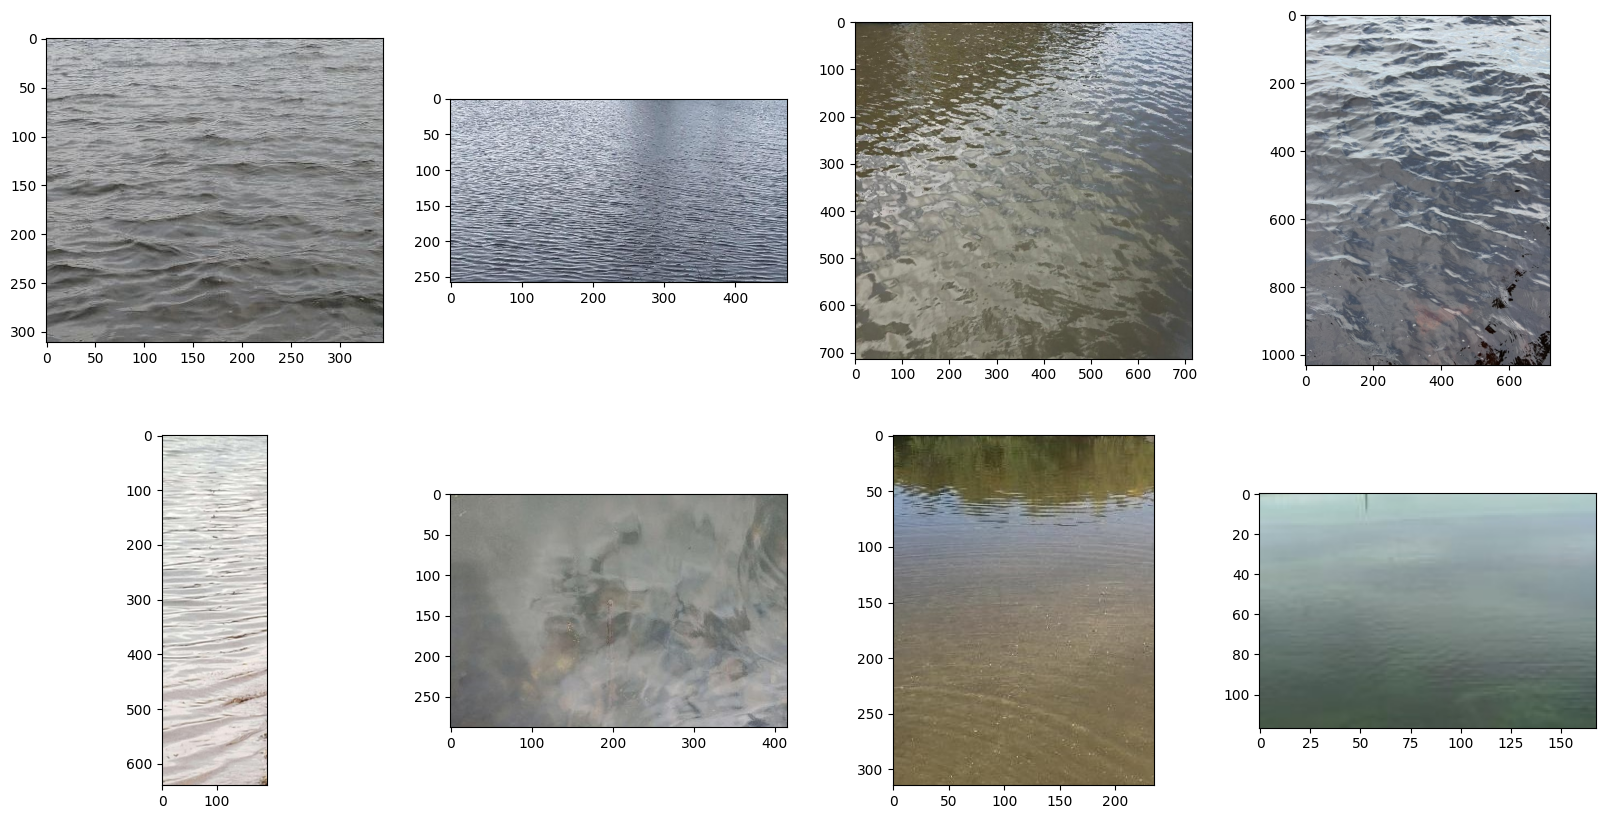

In [ ]:
#check first few images of no advisory
images = []
for idx, img in enumerate(df_noadvisory.image_path):
    img = load_img(
    img)
    images.append(img)

nrows, ncols = 2,4 #print first 8 images
f, axs = plt.subplots(nrows, ncols, figsize=(20,10))
indx = 0
for i in range(nrows):
    for j in range(ncols):
        axs[i,j].imshow(images[indx])
        indx += 1

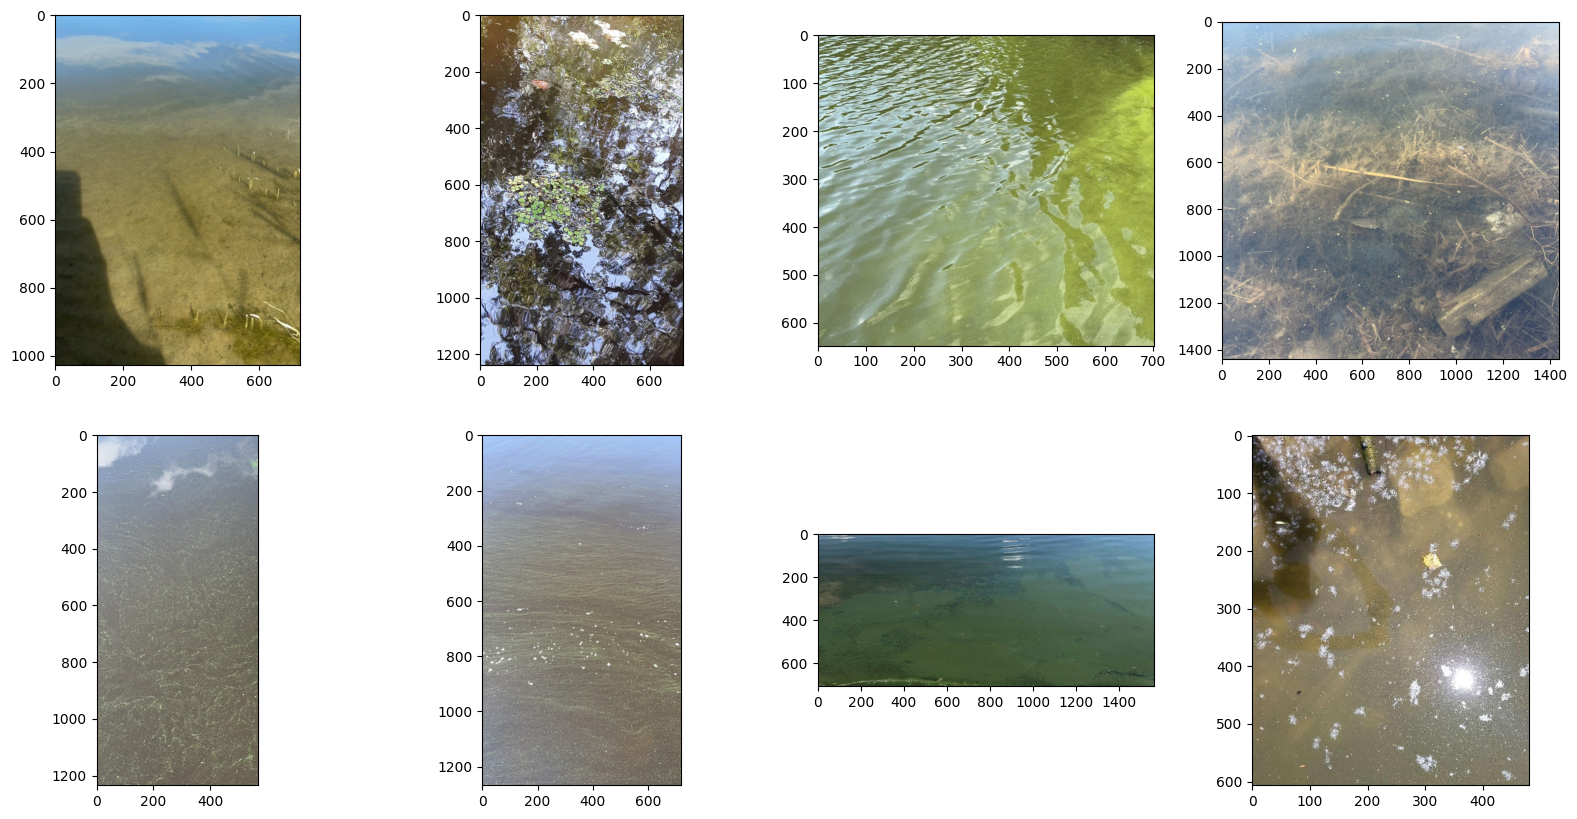

In [ ]:
#check first few images of caution
images = []
for idx, img in enumerate(df_caution.image_path):
    img = load_img(
    img)
    images.append(img)

nrows, ncols = 2,4 #print first 8 images
f, axs = plt.subplots(nrows, ncols, figsize=(20,10))
indx = 0
for i in range(nrows):
    for j in range(ncols):
        axs[i,j].imshow(images[indx])
        indx += 1

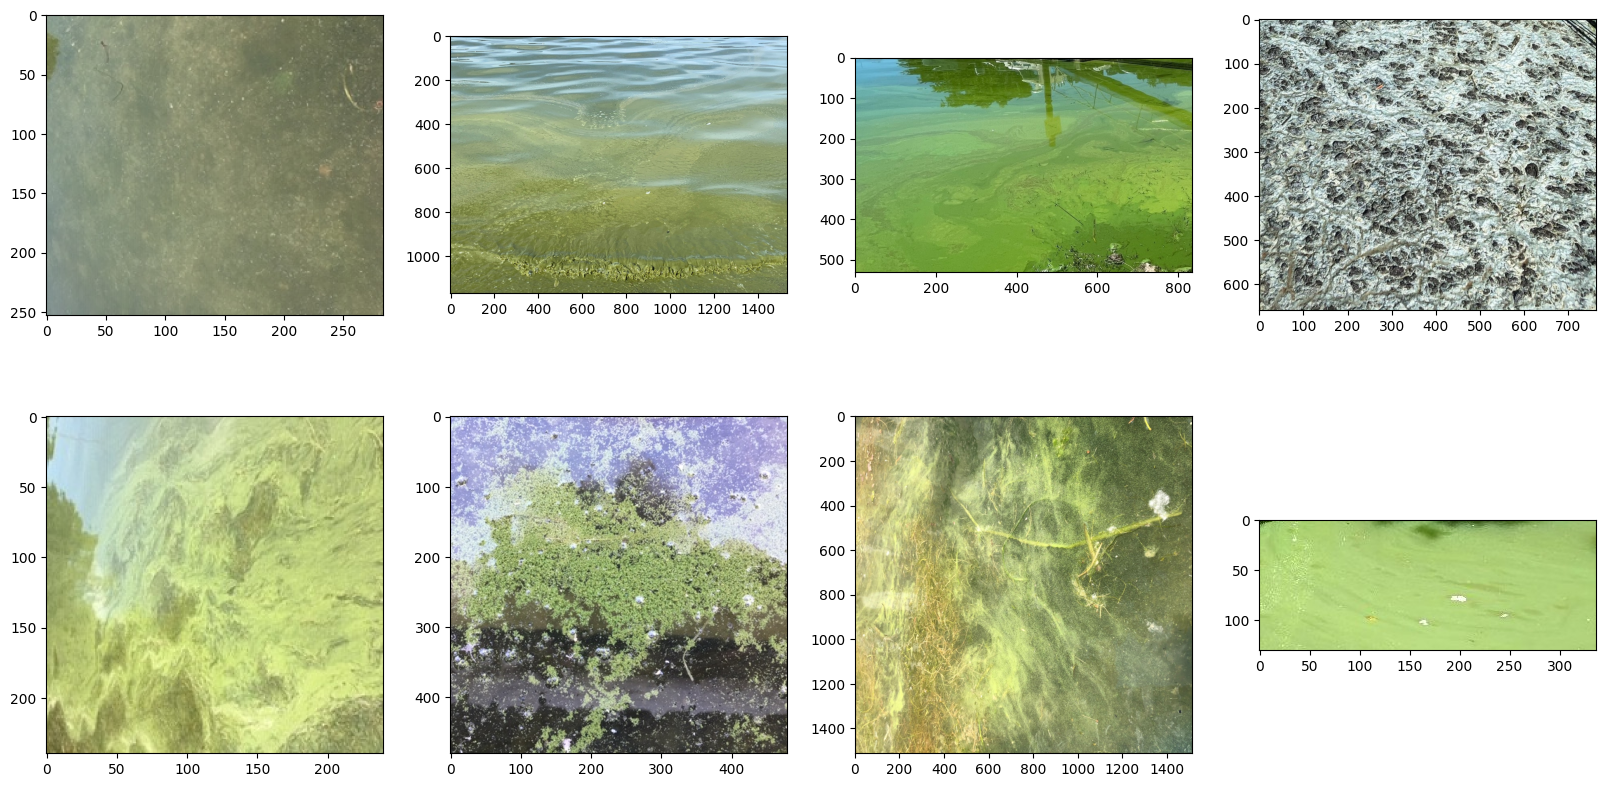

In [ ]:
#check first few images of danger
images = []
for idx, img in enumerate(df_danger.image_path):
    img = load_img(
    img)
    images.append(img)

nrows, ncols = 2,4 #print first 8 images
f, axs = plt.subplots(nrows, ncols, figsize=(20,10))
indx = 0
for i in range(nrows):
    for j in range(ncols):
        axs[i,j].imshow(images[indx])
        indx += 1

In [ ]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

df_res = pd.DataFrame(columns = ['height', 'width'])

for img in df.image_path:
    img = load_img(img)
    width = int(img.width)
    height = int(img.height)

    df_res = df_res.append({'height': height, 'width': width}, ignore_index=True)

In [ ]:
df_res = df_res.astype({'height':int, 'width':int})

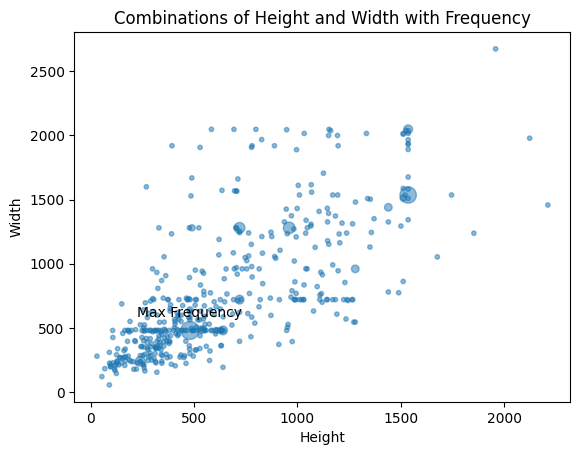

In [ ]:
combination_frequency = df_res.groupby(['height', 'width']).size().reset_index(name='frequency')

plt.scatter(combination_frequency['height'], combination_frequency['width'], s=combination_frequency['frequency']*10, alpha=0.5)

# Find the index with the maximum frequency
max_freq_index = combination_frequency['frequency'].idxmax()

# Annotate the point with the highest frequency
plt.annotate('Max Frequency',
             (combination_frequency['height'][max_freq_index], combination_frequency['width'][max_freq_index]),
             textcoords="offset points",
             xytext=(0,10),
             ha='center')

plt.xlabel('Height')
plt.ylabel('Width')
plt.title('Combinations of Height and Width with Frequency')
plt.show()

# Data Preprocessing


## Resizing Images

In [ ]:
# Define the target size for resizing
target_size = (224, 224)

# Function to load and resize images
def load_and_resize_image(file_path):
    img = load_img(file_path)
    resized_img = img.resize(target_size, Image.ANTIALIAS)  # Resize the image to the target size
    return resized_img

# Apply the function to each row in the Cayuga Lake DataFrame
df['ResizedImage'] = df['image_path'].apply(load_and_resize_image)

<ipython-input-37-4dc2c4d3c0a4>:7: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  resized_img = img.resize(target_size, Image.ANTIALIAS)  # Resize the image to the target size


In [ ]:
#Covert Image to Pixel
df['PixelArray'] = df['ResizedImage'].apply(lambda img: img_to_array(img) / 255.0)

In [ ]:
df['binary_label'] = df['label'].map({'no_advisory': 0, 'caution': 1, 'danger': 1})
df

image_path        label  \
0         ./no_advisory/357_image2-20201208-144523.jpg  no_advisory   
1             ./no_advisory/Image1-20220203-151948.jpg  no_advisory   
2          ./no_advisory/BloomImg1-20230605-165450.jpg  no_advisory   
3          ./no_advisory/BloomImg1-20231009-141835.jpg  no_advisory   
4         ./no_advisory/361_image3-20201209-144728.jpg  no_advisory   
..                                                 ...          ...   
159                              ./danger/5AFB4F~1.PNG       danger   
160                              ./danger/5A0451~1.PNG       danger   
161                                   ./danger/L4m.png       danger   
162  ./danger/115725572_1197131097300142_2325267514...       danger   
163                                   ./danger/L4k.png       danger   

                                          ResizedImage  \
0    <PIL.Image.Image image mode=RGB size=224x224 a...   
1    <PIL.Image.Image image mode=RGB size=224x224 a...   
2    <PIL.Image.Image image mode=RGB size=224x224 a...   
3    <PIL.Image.Image image mode=RGB size=224x224 a...   
4    <PIL.Image.Image image mode=RGB size=224x224 a...   
..                                                 ...   
159  <PIL.Image.Image image mode=RGB size=224x224 a...   
160  <PIL.Image.Image image mode=RGB size=224x224 a...   
161  <PIL.Image.Image image mode=RGB size=224x224 a...   
162  <PIL.Image.Image image mode=RGB size=224x224 a...   
163  <PIL.Image.Image image mode=RGB size=224x224 a...   

                                            PixelArray  binary_label  
0    [[[0.7490196, 0.7607843, 0.78039217], [0.74509...             0  
1    [[[0.6, 0.62352943, 0.6745098], [0.5372549, 0....             0  
2    [[[0.1764706, 0.17254902, 0.15294118], [0.1647...             0  
3    [[[0.7411765, 0.75686276, 0.8], [0.72156864, 0...             0  
4    [[[0.85490197, 0.8745098, 0.8509804], [0.85882...             0  
..                                                 ...           ...  
159  [[[0.85882354, 0.8862745, 0.85882354], [0.9019...             1  
160  [[[0.54901963, 0.654902, 0.44705883], [0.53725...             1  
161  [[[0.72156864, 0.7411765, 0.48235294], [0.7294...             1  
162  [[[0.38039216, 0.47843137, 0.21960784], [0.462...             1  
163  [[[0.23921569, 0.3529412, 0.15686275], [0.2313...             1  

[524 rows x 5 columns]